In [19]:
# Welcome to the ipynb!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
data = pd.read_csv('clean_data.txt', sep='\t')
data.head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDP2019
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,55869,144,4.2,4.3,11.7,70,15,1501769.0
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,223234,373,4.1,4.2,10.3,223,14,6140514.0
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,24686,97,5.1,4.6,11.5,22,15,762856.0
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,22394,23,4.4,4.3,11.2,23,11,389547.0
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,57826,125,4.5,4.7,11.7,52,10,869049.0
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,10101,32,5.2,4.8,11.2,10,21,246089.0
6,1013,"('Butler County', 'AL')",3.7,15.0,45.2,23.7,16.1,19448,114,5.1,5.1,10.6,23,14,601174.0
7,1015,"('Calhoun County', 'AL')",3.6,15.6,32.8,33.2,18.5,113605,719,4.3,4.5,11.8,164,15,4050073.0
8,1017,"('Chambers County', 'AL')",2.9,18.4,36.7,31.6,13.3,33254,170,5.0,4.9,11.4,60,16,819345.0
9,1019,"('Cherokee County', 'AL')",2.9,18.4,40.3,28.6,12.8,26196,77,4.3,4.7,11.4,26,15,531160.0


In [20]:
# First thing that we need to do is add 2 derived features (RGDP/CAPITA) and 1000s of people per violent crime, then we can go forward with analysis
data = data.assign(RGDPPERCAPITA=data['RGDP2019']/data['POPEST2019'])
data = data.assign(VIOL_CRIME_PER_1000=(data['POPEST2019']/1000)/data['VIOLCRIMECT'])
data.head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,55869,144,4.2,4.3,11.7,70,15,1501769.0,26.880184,0.387979
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,223234,373,4.1,4.2,10.3,223,14,6140514.0,27.507073,0.598483
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,24686,97,5.1,4.6,11.5,22,15,762856.0,30.902374,0.254495
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,22394,23,4.4,4.3,11.2,23,11,389547.0,17.395150,0.973652
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,57826,125,4.5,4.7,11.7,52,10,869049.0,15.028690,0.462608
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,10101,32,5.2,4.8,11.2,10,21,246089.0,24.362835,0.315656
6,1013,"('Butler County', 'AL')",3.7,15.0,45.2,23.7,16.1,19448,114,5.1,5.1,10.6,23,14,601174.0,30.911868,0.170596
7,1015,"('Calhoun County', 'AL')",3.6,15.6,32.8,33.2,18.5,113605,719,4.3,4.5,11.8,164,15,4050073.0,35.650482,0.158004
8,1017,"('Chambers County', 'AL')",2.9,18.4,36.7,31.6,13.3,33254,170,5.0,4.9,11.4,60,16,819345.0,24.638991,0.195612
9,1019,"('Cherokee County', 'AL')",2.9,18.4,40.3,28.6,12.8,26196,77,4.3,4.7,11.4,26,15,531160.0,20.276378,0.340208


In [21]:
# now we need to clean up the data a little bit, replacing missing values with median and so on
data = data.replace('No data', np.nan)
data = data.fillna(data['AVG_DAILY_PM25'].median())
data = data.drop('RGDP2019', axis=1)
data = data.drop('POPEST2019', axis=1)
data

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,144,4.2,4.3,11.7,70,15,26.880184,0.387979
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,373,4.1,4.2,10.3,223,14,27.507073,0.598483
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,97,5.1,4.6,11.5,22,15,30.902374,0.254495
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,23,4.4,4.3,11.2,23,11,17.395150,0.973652
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,125,4.5,4.7,11.7,52,10,15.028690,0.462608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,56037,"('Sweetwater County', 'WY')",4.0,7.2,33.0,37.2,22.5,134,3.5,3.5,5.1,44,10,91.185627,0.315993
3127,56039,"('Teton County', 'WY')",2.8,4.8,14.9,23.3,57.0,49,3.2,3.1,4.9,42,16,95.899719,0.478857
3128,56041,"('Uinta County', 'WY')",4.0,7.3,41.5,35.2,16.0,9,3.7,3.7,5.9,11,11,45.798823,2.247333
3129,56043,"('Washakie County', 'WY')",4.1,10.2,29.8,36.6,23.4,7,3.6,3.5,4.8,16,11,47.321461,1.115000


Now  we are going to need to get the wellbeing metric. In order to do this, we must do two things.
<ol>
    <li>Standardize all data. This should control for outliers.</li>
    <li>Calculate the wellbeing metric (average of all scores)</li>
</ol>

In [22]:
data.columns.values[2:]

array(['%UNEMPLOYED', '%LESSHS', '%HS', '%SOMECOLL', '%COLLEGEHIGHER',
       'VIOLCRIMECT', 'AVG_PHYS_UNHEALTHY_DAYS',
       'AVG_MENT_UNHEALTHY_DAYS', 'AVG_DAILY_PM25', 'NUM_ASSOC',
       '%_SEV_HOUS', 'RGDPPERCAPITA', 'VIOL_CRIME_PER_1000'], dtype=object)

In [23]:
# standardize the data using a StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
num_pipe = Pipeline([
    ('Scale',StandardScaler())
])
standardizer = ColumnTransformer([
    ('num_ele', num_pipe,data.columns.values[2:])
])
data_processed = pd.DataFrame(standardizer.fit_transform(data))

ValueError: Input contains infinity or a value too large for dtype('float64').

In [74]:
cols = data.columns.values[2:]
data_processed.columns.values = cols
data_processed

AttributeError: can't set attribute

In [58]:
# add our wellbeing metric to the data (wellbeing = (viol crime per 1000 + avg ment. unhealthy days + avg. phys. unhealthy days + rgdppercapita + %unemployed)/5)
data = data.assign(WELLBEING=(-data['VIOL_CRIME_PER_1000']+data['RGDPPERCAPITA']-data['AVG_MENT_UNHEALTHY_DAYS']-data['AVG_PHYS_UNHEALTHY_DAYS']-data['%UNEMPLOYED'])/5)
data.head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,55869,144,4.2,4.3,1501769.0,26.880184,2.577458,2.620545
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,223234,373,4.1,4.2,6140514.0,27.507073,1.670892,2.947236
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,24686,97,5.1,4.6,762856.0,30.902374,3.929353,2.694604
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,22394,23,4.4,4.3,389547.0,17.395150,1.027061,0.913618
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,57826,125,4.5,4.7,869049.0,15.028690,2.161657,0.193406
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,10101,32,5.2,4.8,246089.0,24.362835,3.168003,1.498966
6,1013,"('Butler County', 'AL')",3.7,15.0,45.2,23.7,16.1,19448,114,5.1,5.1,601174.0,30.911868,5.861785,2.230016
7,1015,"('Calhoun County', 'AL')",3.6,15.6,32.8,33.2,18.5,113605,719,4.3,4.5,4050073.0,35.650482,6.328947,3.384307
8,1017,"('Chambers County', 'AL')",2.9,18.4,36.7,31.6,13.3,33254,170,5.0,4.9,819345.0,24.638991,5.112167,1.345365
9,1019,"('Cherokee County', 'AL')",2.9,18.4,40.3,28.6,12.8,26196,77,4.3,4.7,531160.0,20.276378,2.939380,1.087400


In [59]:
data.describe()

,FIPS,%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
count,3131.000000,3131.000000,3131.000000,3131.000000,3131.00000,3131.000000,3.131000e+03,3131.000000,3131.000000,3131.000000,3.131000e+03,3131.000000,3131.000000,3131.000000
mean,30433.217183,3.934462,13.056915,34.155541,30.81268,21.976525,1.048022e+05,369.983711,3.920888,3.931779,6.159956e+06,78.916912,2.281424,12.969672
std,15115.964612,1.436740,6.260842,7.229430,5.21027,9.575049,3.339933e+05,1616.034983,0.711659,0.613123,2.659249e+07,1089.463823,1.990031,217.905582
min,1001.000000,0.800000,1.100000,7.300000,5.20000,0.000000,1.690000e+02,0.000000,2.300000,2.400000,2.287000e+04,5.917532,0.000000,-3.415612
25%,19004.000000,3.000000,8.500000,29.700000,27.30000,15.300000,1.097850e+04,13.000000,3.400000,3.500000,3.896190e+05,28.474646,0.977964,2.720784
50%,29181.000000,3.700000,11.700000,34.500000,30.80000,19.600000,2.592500e+04,49.000000,3.900000,3.900000,1.004716e+06,39.117294,1.797239,5.041776
75%,45080.000000,4.600000,16.700000,39.100000,34.20000,26.000000,6.825900e+04,166.000000,4.400000,4.300000,2.959161e+06,53.626621,3.073468,8.165427
max,56045.000000,20.900000,73.600000,57.400000,60.60000,77.600000,1.003911e+07,42725.000000,6.400000,6.000000,7.269433e+08,59848.923077,26.821781,11966.981183


In [60]:
data.sort_values('WELLBEING', ascending=False)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
2664,48301,"('Loving County', 'TX')",0.8,19.7,19.7,60.6,0.0,169,1,3.6,3.7,10114468.0,59848.923077,5.917160,11966.981183
2915,51610,"('Falls Church city', 'VA')",2.0,1.1,7.3,14.1,77.6,14617,18,2.7,3.1,110392881.0,7552.362386,1.231443,1508.666189
2669,48311,"('McMullen County', 'TX')",1.6,7.3,32.7,31.3,28.8,743,1,3.6,3.4,3450145.0,4643.532974,1.345895,926.717416
2914,51600,"('Fairfax city', 'VA')",2.1,6.0,13.4,19.8,60.8,24019,18,2.8,3.0,110392881.0,4596.064824,0.749407,917.483083
2600,48173,"('Glasscock County', 'TX')",2.3,30.6,18.7,23.6,27.2,1409,0,3.3,3.3,5687309.0,4036.415188,0.000000,805.503038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,21153,"('Magoffin County', 'KY')",10.6,30.3,36.4,23.8,9.5,12161,4,5.4,5.1,145734.0,11.983718,0.328920,-1.889040
1016,21063,"('Elliott County', 'KY')",7.9,25.0,43.4,21.9,9.7,7517,2,5.8,5.1,71983.0,9.576028,0.266064,-1.898007
3033,54105,"('Wirt County', 'WV')",7.8,17.1,42.0,29.7,11.2,5821,16,5.2,5.2,59268.0,10.181756,2.748669,-2.153383
1424,28063,"('Jefferson County', 'MS')",16.0,22.0,37.9,24.2,15.9,6990,15,5.1,4.7,118147.0,16.902289,2.145923,-2.208727


Loving County appears to have a wildly high GDP per capita. I attribute this to the fact that their economy is based entirely on oil, and though they only have 169 people, a lot of money goes through the county. For the sake of a measured observation, I will remove this county from consideration. Additionally, 

In [61]:
loving_ind = data[(data.FIPS == 48301)].index
data_no_loving = data.drop(loving_ind)
data_no_loving.sort_values('WELLBEING', ascending=False)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
2915,51610,"('Falls Church city', 'VA')",2.0,1.1,7.3,14.1,77.6,14617,18,2.7,3.1,110392881.0,7552.362386,1.231443,1508.666189
2669,48311,"('McMullen County', 'TX')",1.6,7.3,32.7,31.3,28.8,743,1,3.6,3.4,3450145.0,4643.532974,1.345895,926.717416
2914,51600,"('Fairfax city', 'VA')",2.1,6.0,13.4,19.8,60.8,24019,18,2.8,3.0,110392881.0,4596.064824,0.749407,917.483083
2600,48173,"('Glasscock County', 'TX')",2.3,30.6,18.7,23.6,27.2,1409,0,3.3,3.3,5687309.0,4036.415188,0.000000,805.503038
2672,48317,"('Martin County', 'TX')",2.6,22.6,33.0,26.1,18.3,5771,12,3.7,3.5,12836342.0,2224.283833,2.079362,442.480894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,21153,"('Magoffin County', 'KY')",10.6,30.3,36.4,23.8,9.5,12161,4,5.4,5.1,145734.0,11.983718,0.328920,-1.889040
1016,21063,"('Elliott County', 'KY')",7.9,25.0,43.4,21.9,9.7,7517,2,5.8,5.1,71983.0,9.576028,0.266064,-1.898007
3033,54105,"('Wirt County', 'WV')",7.8,17.1,42.0,29.7,11.2,5821,16,5.2,5.2,59268.0,10.181756,2.748669,-2.153383
1424,28063,"('Jefferson County', 'MS')",16.0,22.0,37.9,24.2,15.9,6990,15,5.1,4.7,118147.0,16.902289,2.145923,-2.208727


In [62]:
data_no_top_20 = data.sort_values('WELLBEING', ascending=False).iloc[20:]
data_no_top_20.sort_values('WELLBEING', ascending=False).head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
2577,48127,"('Dimmit County', 'TX')",2.5,33.6,36.2,16.6,13.6,10124,16,4.5,3.9,5861898.0,579.010075,1.580403,113.305934
2645,48263,"('Kent County', 'TX')",2.3,14.2,32.6,27.8,25.4,762,2,3.3,3.4,380154.0,498.889764,2.624672,97.453018
2751,48475,"('Ward County', 'TX')",2.4,21.4,36.2,29.9,12.5,11998,43,3.8,3.5,5888166.0,490.762294,3.583931,95.495673
2923,51683,"('Manassas city', 'VA')",2.4,17.3,25.8,27.3,29.6,41085,139,3.3,3.3,18476449.0,449.712766,3.383230,87.465907
554,16023,"('Butte County', 'ID')",2.5,7.2,36.0,40.6,16.2,2597,7,3.7,3.8,1098397.0,422.948402,2.695418,82.050597
1752,32029,"('Storey County', 'NV')",3.7,6.4,27.8,34.5,31.4,4123,28,3.5,3.9,1731617.0,419.989571,6.791171,80.419680
2630,48233,"('Hutchinson County', 'TX')",4.4,14.0,34.4,37.5,14.0,20938,132,3.7,3.7,8692809.0,415.169023,6.304327,79.412939
2764,48501,"('Yoakum County', 'TX')",2.9,36.5,26.2,24.6,12.7,8713,14,3.8,3.5,3432549.0,393.957190,1.606794,76.430079
1850,36061,"('New York County', 'NY')",3.4,12.7,12.4,13.5,61.3,1628706,9767,3.4,3.6,635274518.0,390.048614,5.996785,74.730366
2928,51720,"('Norton city', 'VA')",3.5,16.0,24.0,37.3,22.8,3981,12,4.2,4.2,1512684.0,379.975885,3.014318,73.012313


0.0003384110367954356


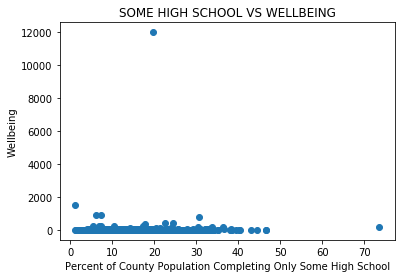

In [64]:
# begin by extracting our data of interest and placing them into scatterplots
plt.scatter(data['%LESSHS'],data['WELLBEING'])
slope, intercept, r_value, p_value, std_err = linregress(data['%LESSHS'], data['WELLBEING'])
print(r_value**2)
plt.title('SOME HIGH SCHOOL VS WELLBEING')
plt.xlabel('Percent of County Population Completing Only Some High School')
plt.ylabel('Wellbeing')
plt.show()

From this scatter, we can see that those counties with extremely high GDP skew the wellbeing metric too far. To deal with this for initial analysis, we will simply drop the top 20 counties, though this is not the best long-term choice. We should, instead, rethink the wellbeing metric. Perhaps we could use the sigmoid function, this would bound on 0-1. Alternatively, we may standardize the values used in the mean (if normality holds). In general, though, we need to find a metric which has relatively small scale/is less sensitive to extreme outliers.

-0.09541634125531674


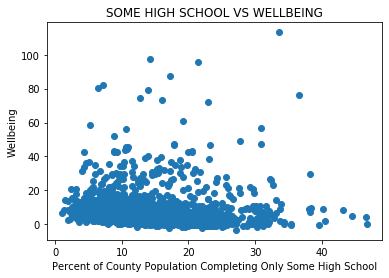

In [67]:
plt.scatter(data_no_top_20['%LESSHS'],data_no_top_20['WELLBEING'])
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%LESSHS'], data_no_top_20['WELLBEING'])
print(r_value)
plt.title('SOME HIGH SCHOOL VS WELLBEING')
plt.xlabel('Percent of County Population Completing Only Some High School')
plt.ylabel('Wellbeing')
plt.show()

-0.2320884764261144


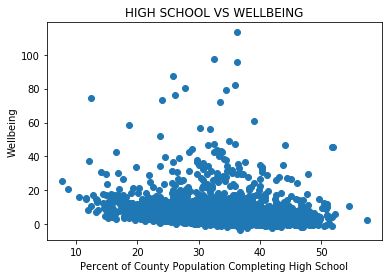

In [68]:
plt.scatter(data_no_top_20['%HS'],data_no_top_20['WELLBEING'])
plt.title('HIGH SCHOOL VS WELLBEING')
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%HS'], data_no_top_20['WELLBEING'])
print(r_value)
plt.xlabel('Percent of County Population Completing High School')
plt.ylabel('Wellbeing')
plt.show()

0.038607322879991114


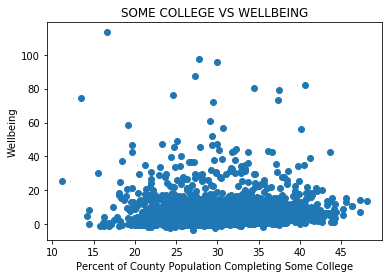

In [71]:
plt.scatter(data_no_top_20['%SOMECOLL'],data_no_top_20['WELLBEING'])
plt.title('SOME COLLEGE VS WELLBEING')
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%SOMECOLL'], data_no_top_20['WELLBEING'])
print(r_value)
plt.xlabel('Percent of County Population Completing Some College')
plt.ylabel('Wellbeing')
plt.show()

0.21664821306205279


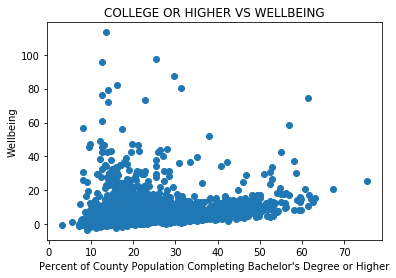

In [72]:
plt.scatter(data_no_top_20['%COLLEGEHIGHER'],data_no_top_20['WELLBEING'])
plt.title('COLLEGE OR HIGHER VS WELLBEING')
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%COLLEGEHIGHER'], data_no_top_20['WELLBEING'])
print(r_value)
plt.xlabel('Percent of County Population Completing Bachelor\'s Degree or Higher')
plt.ylabel('Wellbeing')
plt.show()

Ethical Concerns:
<ul>
    <li>GDP significantly advantages wealthy counties/localities in wellbeing score</li>
    <li>Data does not exist for most of these sets for Puerto Rico, so it has been excluded entirely</li>
    <li>By virtue of having this wellbeing metric, we are essentially saying that certain things are good and/or bad</li>
</ul>
Current Issues:
<ul>
    <li>Extreme sensitivity of current wellbeing metric to outliers, needs to be changed</li>
    <li>Virginia Combined Areas not considered as separate, will need to be fixed</li>
</ul>
What else will we do:
<ul>
    <li>Resolve the issues listed above</li>
    <li>Run 4-way ANOVA test to determine statistically significant differences between the means</li>
    <li>Run k-means classification algorithm to get similar counties grouped together, this may solve the issue of extreme outliers</li>
</ul>